In [25]:
import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [26]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

In [27]:
BEST_MODEL_PATH =  Path('Notebooks', 'models', 'model_results_feature_2_no_regula', 'data_regression')
with open(BEST_MODEL_PATH,"rb") as file:
    data = pickle.load(file)


best_params_rf are {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [28]:
data.keys()

dict_keys(['Neural network', 'Random forest'])

In [29]:
test_features_nn = data["Neural network"]["Test features"]
test_features_rf = data["Random forest"]["Test features"]
test_targets_nn = data["Neural network"]["Test targets"]
test_targets_rf = data["Random forest"]["Test targets"]
test_preds_nn = data["Neural network"]["Test preds"]
test_preds_rf = data["Random forest"]["Test preds"]

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_752\1091178105.py:3: SyntaxWarning: invalid escape sequence '\e'
  "$\epsilon$",


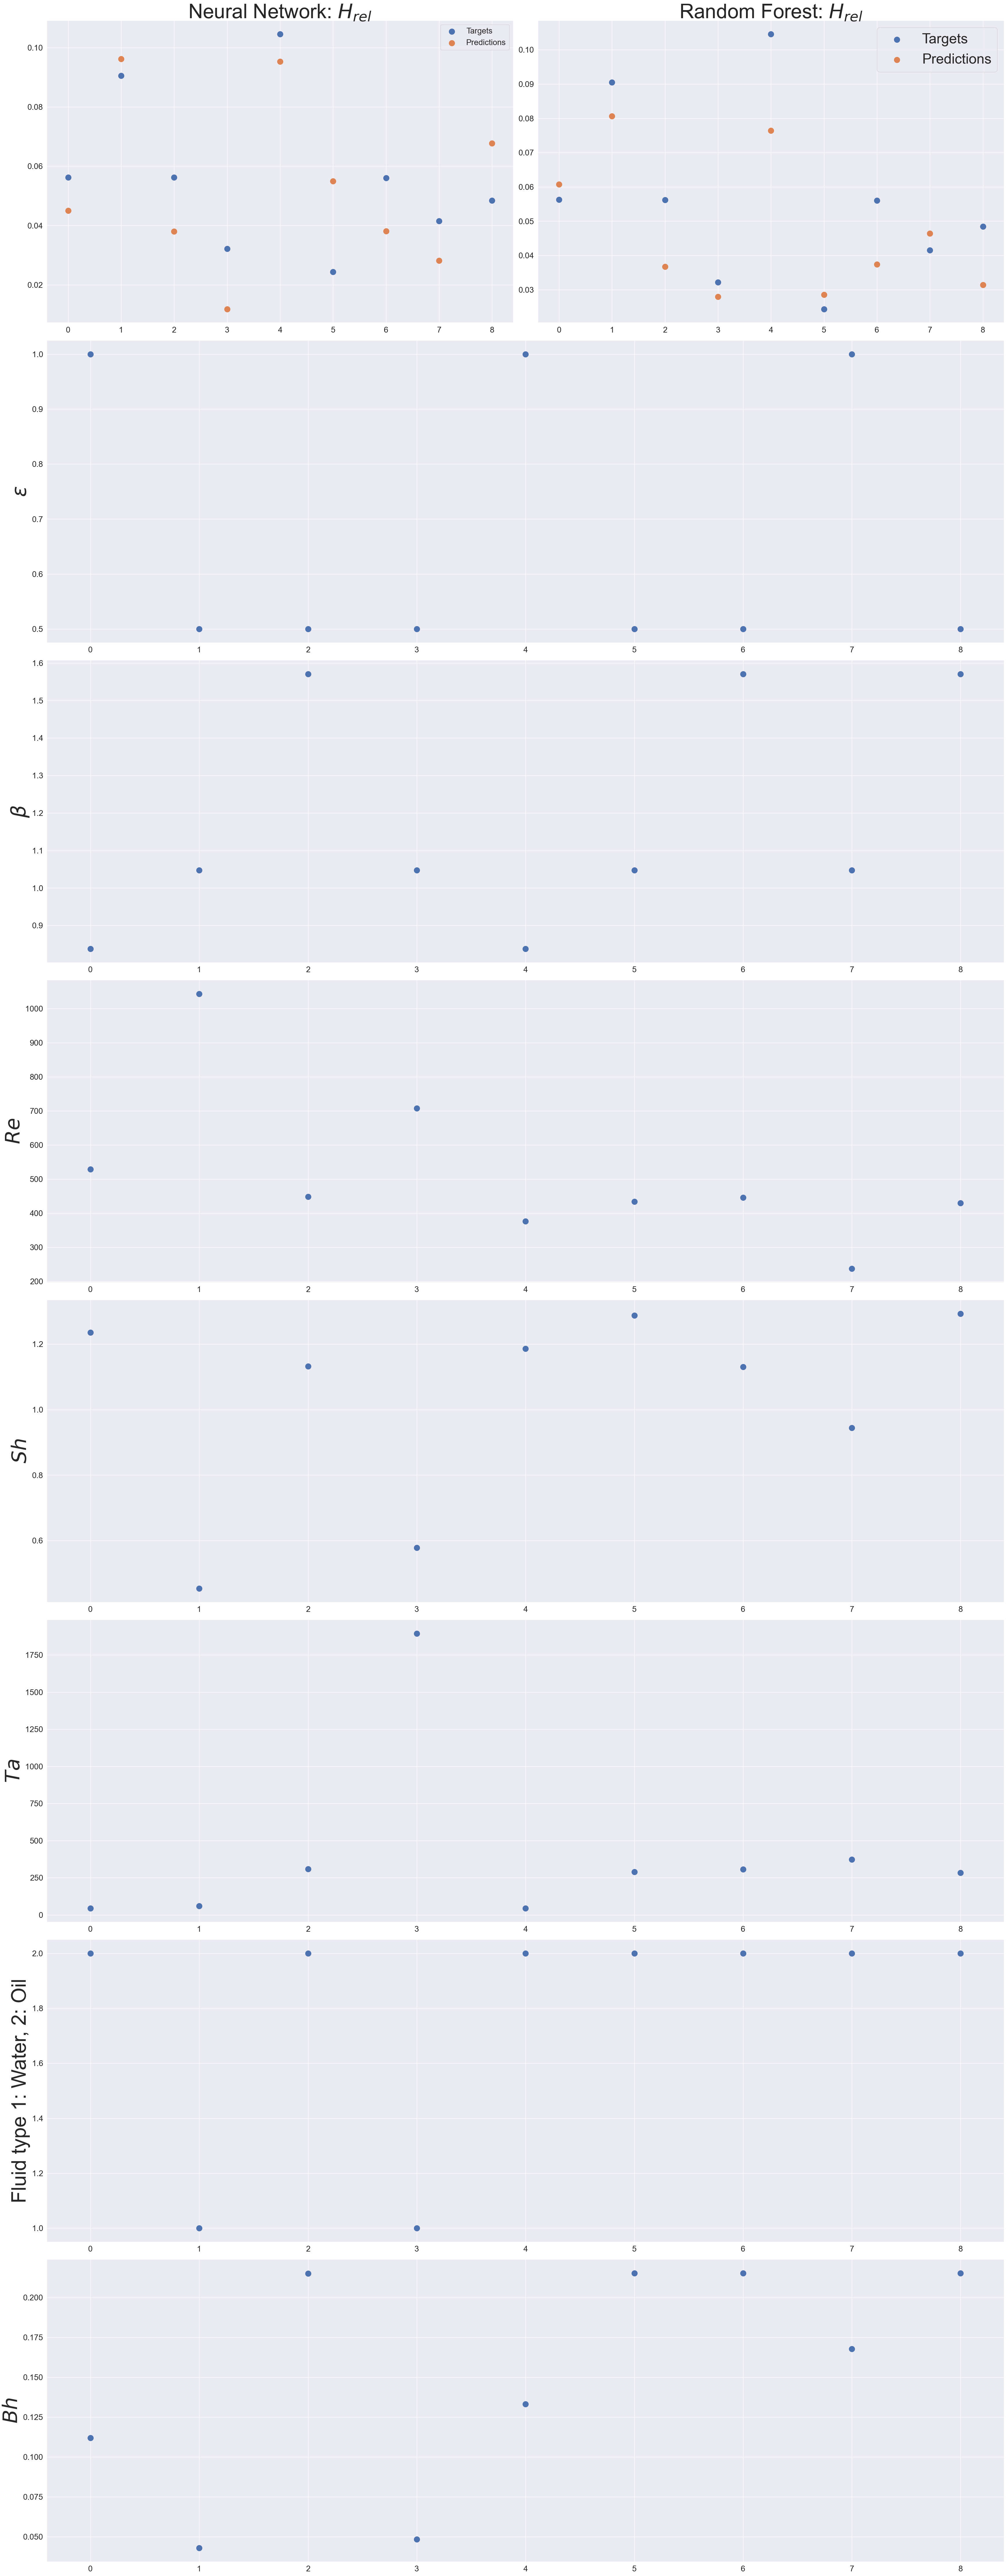

In [48]:
# columns = df.drop(columns = "$\H_{rel}$").columns
name_features = [
    "$\epsilon$",
    r"$\beta$",
    "$Re$",
    "$Sh$",
    "$Ta$",
    "Fluid type",
    "$Bh$",
    "$f$"
]
plt.rcParams.update({
                     'xtick.labelsize': 20,  # X-axis tick labels
                     'ytick.labelsize': 20})  # Y-axis tick labels
x_vals_for_plot = np.arange(0,len(test_features_nn), 1)
import matplotlib.gridspec as gs
fig = plt.figure(figsize = (35,100))
g = gs.GridSpec(len(name_features) + 1, 2)
ax1 = fig.add_subplot(g[0,0])
ax2 = fig.add_subplot(g[0,1])
axes = [fig.add_subplot(g[i, :]) for i in range(1, len(name_features))]

ax1.set_title("Neural Network: $H_{rel}$ ",fontsize = 50)
ax1.scatter(x_vals_for_plot, test_targets_nn, label = "Targets",s = 200)
ax1.scatter(x_vals_for_plot, test_preds_nn, label = 'Predictions',s = 200)
ax1.legend(fontsize = 20)
ax2.set_title("Random Forest: $H_{rel}$",fontsize = 50)
ax2.scatter(x_vals_for_plot, test_targets_rf, label = 'Targets',s = 200)
ax2.scatter(x_vals_for_plot, test_preds_rf, label = 'Predictions',s = 200)
ax2.legend(fontsize = 35)

for idx,ax in enumerate(axes):
    title = name_features[idx]  
    if title == "Fluid type":
        title = title + " 1: Water, 2: Oil"
    ax.set_ylabel(title,fontsize = 50)
    ax.scatter(x_vals_for_plot, test_features_nn[:,idx],s = 200)
plt.tight_layout()